In [15]:
# Classify the email using the binary classification method. Email Spam 
# detection has two states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-
# Nearest Neighbors and Support Vector Machine for classification. Analyze their 
# performance.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\emails.csv\\emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df.shape

(5172, 3002)

In [9]:
df.info

<bound method DataFrame.info of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrast

In [11]:
x=df.drop(['Email No.','Prediction'],axis=1)
y=df['Prediction']

In [13]:
df.shape

(5172, 3002)

<Axes: xlabel='Prediction', ylabel='count'>

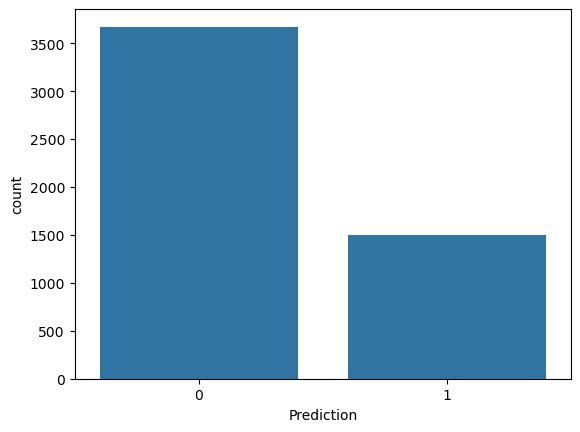

In [17]:
sns.countplot(x=y)

In [23]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=0,test_size=0.25)
x_scaled.shape

(5172, 3000)

In [35]:
x_train.shape

(3879, 3000)

In [37]:
x_test.shape

(1293, 3000)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
y_pred=knn.predict(x_test)

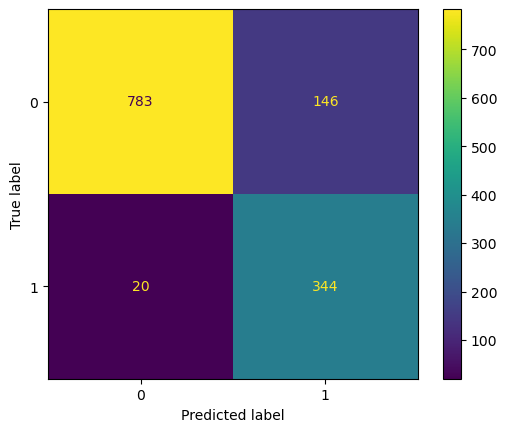

In [47]:
from sklearn.metrics import  ConfusionMatrixDisplay,accuracy_score,classification_report
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [51]:
y_test.value_counts()

Prediction
0    929
1    364
Name: count, dtype: int64

In [53]:
accuracy_score(y_test,y_pred)

0.871616395978345

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293



In [61]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)

SVC()

In [63]:
y_pred=svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.9450889404485692

In [65]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)


SVC(kernel='linear')

In [67]:
y_pred=svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.9767981438515081